Total Game Score Model - NN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

pd.options.display.max_rows = 10
pd.options.display.max_columns = 999


In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2023-05-01 17:53:58.034102: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


Load Data

In [5]:
data = pd.read_csv("/total-points-score-model/data/modelling-data/modelling_data_total_team_score.csv")

In [6]:
data.head(1)

,Unnamed: 0,Match_ID,AFL_API_Match_ID,Home_Team,Away_Team,Date,Venue,Match_Status,Q4_Score,Round_ID,Year,Q1_Score,Q2_Score,Q3_Score,Margin,Total_Game_Score,Home_Win,City,Attendance,Umpires,Home_Coach_ID,Away_Coach_ID,Q5_Score,Temperature,Weather_Type,Home_Score,Away_Score,Home_Goals,Home_Behinds,Home_Total_Score,Away_Goals,Away_Behinds,Away_Total_Score,random5,training_set,Home_Total_Game_Score_avg2,Home_For_Goals_avg2,Home_For_Behinds_avg2,Home_For_Scores_avg2,Home_For_Total_Score_avg2,Home_Against_Goals_avg2,Home_Against_Behinds_avg2,Home_Against_Scores_avg2,Home_Against_Total_Score_avg2,Home_Total_Game_Score_avg10,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Scores_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Behinds_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Goals_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_For_Total_Score_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10
0,1,200701_Adelaide_Essendon,CD_M20070140106,Adelaide,Essendon,2007-04-01 13:10:00,Football Park,CONCLUDED,10.14.74 - 16.9.105,200701,2007,3.4.22 - 5.1.31,5.9.39 - 8.3.51,7.14.56 - 12.8.80,-31,179,0.0,Adelaide,43064.0,"Michael Avon (115), Luke Farmer (1), Hayden Ke...",Neil_Craig,Kevin_Sheedy,NaN,NaN,NaN,10.14.74,16.9.105,10,14,74,16,9,105,1,True,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612


Clean Data

In [7]:
modelling_data = data[data['Date'] < "2019-01-01"]
oot_data = data[data['Date'] >= "2019-01-01"]

In [8]:
modelling_data.shape, oot_data.shape

((2385, 71), (621, 71))

In [9]:
training_data = modelling_data[modelling_data['training_set'] == True]
test_data = modelling_data[modelling_data['training_set'] == False]

In [10]:
training_data.shape, test_data.shape

((1909, 71), (476, 71))

Train Model

In [11]:
response = "Total_Game_Score"

In [12]:
list(training_data)

['Unnamed: 0',
 'Match_ID',
 'AFL_API_Match_ID',
 'Home_Team',
 'Away_Team',
 'Date',
 'Venue',
 'Match_Status',
 'Q4_Score',
 'Round_ID',
 'Year',
 'Q1_Score',
 'Q2_Score',
 'Q3_Score',
 'Margin',
 'Total_Game_Score',
 'Home_Win',
 'City',
 'Attendance',
 'Umpires',
 'Home_Coach_ID',
 'Away_Coach_ID',
 'Q5_Score',
 'Temperature',
 'Weather_Type',
 'Home_Score',
 'Away_Score',
 'Home_Goals',
 'Home_Behinds',
 'Home_Total_Score',
 'Away_Goals',
 'Away_Behinds',
 'Away_Total_Score',
 'random5',
 'training_set',
 'Home_Total_Game_Score_avg2',
 'Home_For_Goals_avg2',
 'Home_For_Behinds_avg2',
 'Home_For_Scores_avg2',
 'Home_For_Total_Score_avg2',
 'Home_Against_Goals_avg2',
 'Home_Against_Behinds_avg2',
 'Home_Against_Scores_avg2',
 'Home_Against_Total_Score_avg2',
 'Home_Total_Game_Score_avg10',
 'Home_For_Goals_avg10',
 'Home_For_Behinds_avg10',
 'Home_For_Scores_avg10',
 'Home_For_Total_Score_avg10',
 'Home_Against_Goals_avg10',
 'Home_Against_Behinds_avg10',
 'Home_Against_Scores_avg10

In [61]:
modelling_features = [
    'Venue',
    'Year',
    'Home_Team',
    'Away_Team',
    'Home_Total_Game_Score_avg2',
    'Home_For_Goals_avg2',
    'Home_For_Behinds_avg2',
    'Home_For_Scores_avg2',
    'Home_For_Total_Score_avg2',
    'Home_Against_Goals_avg2',
    'Home_Against_Behinds_avg2',
    'Home_Against_Scores_avg2',
    'Home_Against_Total_Score_avg2',
    'Home_Total_Game_Score_avg10',
    'Home_For_Goals_avg10',
    'Home_For_Behinds_avg10',
    'Home_For_Scores_avg10',
    'Home_For_Total_Score_avg10',
    'Home_Against_Goals_avg10',
    'Home_Against_Behinds_avg10',
    'Home_Against_Scores_avg10',
    'Home_Against_Total_Score_avg10',
    'Away_Total_Game_Score_avg2',
    'Away_For_Goals_avg2',
    'Away_For_Behinds_avg2',
    'Away_For_Scores_avg2',
    'Away_For_Total_Score_avg2',
    'Away_Against_Goals_avg2',
    'Away_Against_Behinds_avg2',
    'Away_Against_Scores_avg2',
    'Away_Against_Total_Score_avg2',
    'Away_Total_Game_Score_avg10',
    'Away_For_Goals_avg10',
    'Away_For_Behinds_avg10',
    'Away_For_Scores_avg10',
    'Away_For_Total_Score_avg10',
    'Away_Against_Goals_avg10',
    'Away_Against_Behinds_avg10',
    'Away_Against_Scores_avg10',
    'Away_Against_Total_Score_avg10']

In [62]:
X, y = training_data[modelling_features], training_data[response]
X_test, y_test = test_data[modelling_features], test_data[response]
X_oot, y_oot = oot_data[modelling_features], oot_data[response]

In [120]:
X_dummies = pd.get_dummies(X)
X_test_dummies = pd.get_dummies(X_test)
X_oot_dummies = pd.get_dummies(X_oot)

for col in list(X_dummies):
    if col not in list(X_test_dummies):
        X_test_dummies[col] = 0
        
for col in list(X_dummies):
    if col not in list(X_oot_dummies):
        X_oot_dummies[col] = 0

In [64]:
X_dummies.shape, X_test_dummies.shape, X_oot_dummies.shape

((1909, 93), (476, 93), (621, 95))

Neural Network

Normalisation Layer

In [65]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [66]:
normalizer.adapt(np.array(X_dummies))

In [67]:
print(normalizer.mean.numpy())

[[2012.716  180.356   13.017   11.557   24.574   89.66    12.732   11.329
    24.061   87.719  180.646   12.978   11.514   24.492   89.384   12.83
    11.4     24.231   88.383  181.108   12.86    11.436   24.296   88.596
    13.03    11.586   24.616   89.766  180.478   12.901   11.449   24.349
    88.853   12.872   11.474   24.346   88.704    0.049    0.009    0.037
     0.004    0.234    0.002    0.066    0.06     0.04     0.26     0.012
     0.006    0.011    0.042    0.107    0.023    0.003    0.001    0.018
     0.017    0.058    0.058    0.057    0.06     0.057    0.058    0.069
     0.038    0.032    0.063    0.056    0.057    0.057    0.053    0.056
     0.058    0.06     0.056    0.057    0.053    0.057    0.063    0.057
     0.059    0.056    0.041    0.037    0.059    0.054    0.059    0.056
     0.057    0.061    0.059    0.059    0.058]]


Linear Model

Using a single factor - normalise the factor

In [68]:
total_game_score_avg2 = np.array(X_dummies['Home_Total_Game_Score_avg2'])
total_game_score_avg2

array([173.976, 173.976, 173.976, ..., 157.   , 166.   , 164.5  ])

In [69]:
total_game_score_avg2_normalizer = layers.Normalization(input_shape=[1,], axis=None)
total_game_score_avg2_normalizer

In [70]:
total_game_score_avg2_normalizer.adapt(total_game_score_avg2)

Build the Keras Sequential Model

In [71]:
total_game_score_avg2_model = tf.keras.Sequential([
    total_game_score_avg2_normalizer,
    layers.Dense(units=1)
])

total_game_score_avg2_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Predict on the response

In [72]:
total_game_score_avg2_model.predict(total_game_score_avg2)

60/60 [==============================] - 0s 430us/step


array([[0.104],
       [0.104],
       [0.104],
       ...,
       [0.38 ],
       [0.234],
       [0.258]], dtype=float32)

Compile Model with Loss and Optimiser

In [73]:
total_game_score_avg2_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Fit the model for 100 epochs

In [74]:
%%time
history = total_game_score_avg2_model.fit(
    X_dummies['Home_Total_Game_Score_avg2'],
    y,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
48/48 [==============================] - 0s 2ms/step - loss: 180.7140 - val_loss: 167.9363
Epoch 2/100
48/48 [==============================] - 0s 911us/step - loss: 175.7603 - val_loss: 163.7012
Epoch 3/100
48/48 [==============================] - 0s 841us/step - loss: 170.8010 - val_loss: 159.4174
Epoch 4/100
48/48 [==============================] - 0s 845us/step - loss: 165.8565 - val_loss: 155.2915
Epoch 5/100
48/48 [==============================] - 0s 843us/step - loss: 160.9036 - val_loss: 151.1311
Epoch 6/100
48/48 [==============================] - 0s 814us/step - loss: 155.9489 - val_loss: 146.8290
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 151.0031 - val_loss: 142.7100
Epoch 8/100
48/48 [==============================] - 0s 838us/step - loss: 146.0598 - val_loss: 138.4510
Epoch 9/100
48/48 [==============================] - 0s 860us/step - loss: 141.1083 - val_loss: 134.3183
Epoch 10/100
48/48 [==============================] - 0s 84

Visualise training progress

In [75]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,16.769852,16.123428,95
96,16.765339,16.127338,96
97,16.772266,16.113956,97
98,16.773020,16.109814,98
99,16.771044,16.113026,99


In [76]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([10, 50])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

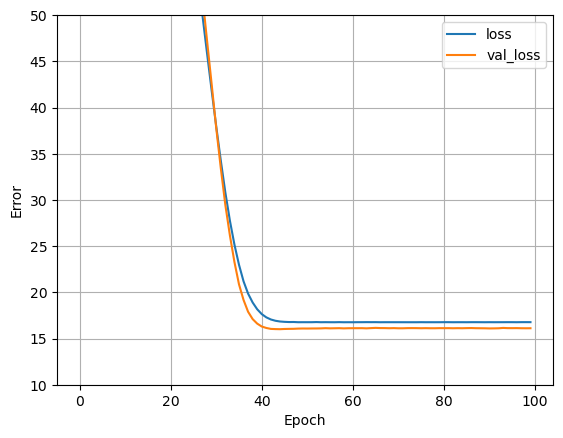

In [77]:
plot_loss(history)

In [78]:
test_results = {}

In [79]:
test_results['total_game_score_avg2_model'] = total_game_score_avg2_model.evaluate(
    X_test_dummies['Home_Total_Game_Score_avg2'],
    y_test, verbose=1)
test_results['total_game_score_avg2_model']

15/15 [==============================] - 0s 518us/step - loss: 16.5806


16.580551147460938

In [80]:
x_axis = tf.linspace(0, 300, 301)
y_axis = total_game_score_avg2_model.predict(x_axis)

10/10 [==============================] - 0s 1ms/step


In [81]:
def plot_total_game_score_avg2(x_axis, y_axis):
  plt.scatter(X_dummies['Home_Total_Game_Score_avg2'], y, label='Data')
  plt.plot(x_axis, y_axis, color='k', label='Predictions')
  plt.xlabel('Total Game Score - Avg 2')
  plt.ylabel('Total Game Score')
  plt.legend()

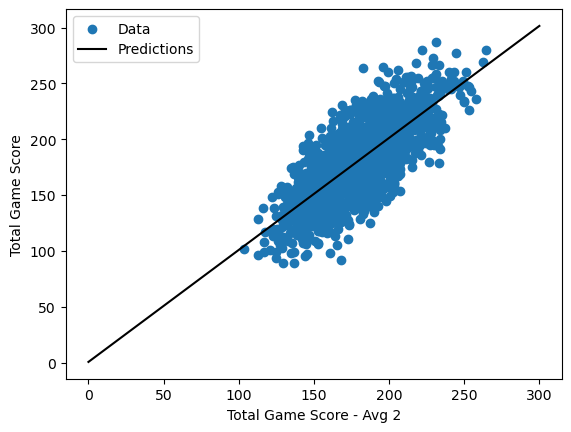

In [82]:
plot_total_game_score_avg2(x_axis, y_axis)

Linear Model with multiple inputs

Create two step sequential model again

In [83]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 93)               187       
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 94        
                                                                 
Total params: 281
Trainable params: 94
Non-trainable params: 187
_________________________________________________________________


In [84]:
X_dummies.shape

(1909, 93)

In [85]:
X_dummies.head()

,Year,Home_Total_Game_Score_avg2,Home_For_Goals_avg2,Home_For_Behinds_avg2,Home_For_Scores_avg2,Home_For_Total_Score_avg2,Home_Against_Goals_avg2,Home_Against_Behinds_avg2,Home_Against_Scores_avg2,Home_Against_Total_Score_avg2,Home_Total_Game_Score_avg10,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Scores_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Behinds_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Goals_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_For_Total_Score_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10,Venue_Adelaide Oval,Venue_Bellerive Oval,Venue_Carrara,Venue_Cazalys Stadium,Venue_Docklands,Venue_Eureka Stadium,Venue_Football Park,Venue_Gabba,Venue_Kardinia Park,Venue_M.C.G.,Venue_Manuka Oval,Venue_Marrara Oval,Venue_Perth Stadium,Venue_S.C.G.,Venue_Subiaco,Venue_Sydney Showground,Venue_Traeger Park,Venue_Wellington,Venue_York Park,Venue_character(0),Home_Team_Adelaide,Home_Team_Brisbane Lions,Home_Team_Carlton,Home_Team_Collingwood,Home_Team_Essendon,Home_Team_Fremantle,Home_Team_Geelong,Home_Team_Gold Coast,Home_Team_Greater Western Sydney,Home_Team_Hawthorn,Home_Team_Melbourne,Home_Team_North Melbourne,Home_Team_Port Adelaide,Home_Team_Richmond,Home_Team_St Kilda,Home_Team_Sydney,Home_Team_West Coast,Home_Team_Western Bulldogs,Away_Team_Adelaide,Away_Team_Brisbane Lions,Away_Team_Carlton,Away_Team_Collingwood,Away_Team_Essendon,Away_Team_Fremantle,Away_Team_Geelong,Away_Team_Gold Coast,Away_Team_Greater Western Sydney,Away_Team_Hawthorn,Away_Team_Melbourne,Away_Team_North Melbourne,Away_Team_Port Adelaide,Away_Team_Richmond,Away_Team_St Kilda,Away_Team_Sydney,Away_Team_West Coast,Away_Team_Western Bulldogs
0,2007,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2007,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,2007,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2007,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,173.975516,12.487906,11.141101,23.629007,86.068535,12.442871,11.105605,23.548476,85.762832,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,2007,173.975516,12.487906,11.141101,23.629007,86.0

In [86]:
linear_model.predict(X_dummies)

60/60 [==============================] - 0s 349us/step


array([[-1.418],
       [ 1.331],
       [ 0.369],
       ...,
       [-1.324],
       [-1.479],
       [ 0.263]], dtype=float32)

Compile the model and fit

In [87]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [88]:
%%time
history = linear_model.fit(
    X_dummies,
    y,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
48/48 [==============================] - 0s 2ms/step - loss: 178.9965 - val_loss: 187.5226
Epoch 2/100
48/48 [==============================] - 0s 904us/step - loss: 168.9262 - val_loss: 202.6571
Epoch 3/100
48/48 [==============================] - 0s 902us/step - loss: 159.2300 - val_loss: 218.2091
Epoch 4/100
48/48 [==============================] - 0s 881us/step - loss: 149.8375 - val_loss: 231.3133
Epoch 5/100
48/48 [==============================] - 0s 902us/step - loss: 141.9704 - val_loss: 239.7070
Epoch 6/100
48/48 [==============================] - 0s 873us/step - loss: 135.2817 - val_loss: 243.1009
Epoch 7/100
48/48 [==============================] - 0s 872us/step - loss: 128.8835 - val_loss: 245.0554
Epoch 8/100
48/48 [==============================] - 0s 900us/step - loss: 122.5111 - val_loss: 248.0144
Epoch 9/100
48/48 [==============================] - 0s 877us/step - loss: 116.2673 - val_loss: 249.1295
Epoch 10/100
48/48 [==============================] - 0s 

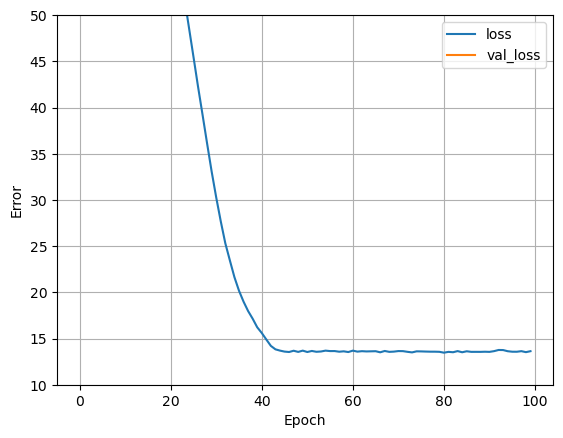

In [89]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([10, 50])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [90]:
test_results['linear_model'] = linear_model.evaluate(
    X_test_dummies, y_test, verbose=0)

In [91]:
abs_difference = abs(linear_model.predict(X_test_dummies).flatten() - np.array(y_test))
abs_difference.min(), abs_difference.mean(), np.median(abs_difference), abs_difference.max()

15/15 [==============================] - 0s 453us/step


(0.002410888671875, 379.0893075766684, 18.117446899414062, 4044.579345703125)

In [92]:
train_preds = linear_model.predict(X_dummies)
train_evaluation = pd.DataFrame({
    'Predictions':train_preds.flatten(),
    'Actuals':y
})
train_evaluation['abs_difference'] = abs(train_evaluation['Predictions'] - train_evaluation['Actuals'])
train_evaluation.describe()

60/60 [==============================] - 0s 372us/step


,Predictions,Actuals,abs_difference
count,1909.000000,1909.000000,1909.000000
mean,157.579727,180.902567,37.195304
std,229.796890,32.134119,225.004589
min,-3865.694336,89.000000,0.002655
25%,161.415665,160.000000,5.232269
50%,179.864899,181.000000,11.804993
75%,199.202576,202.000000,20.670868
max,281.941895,287.000000,3984.708008


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

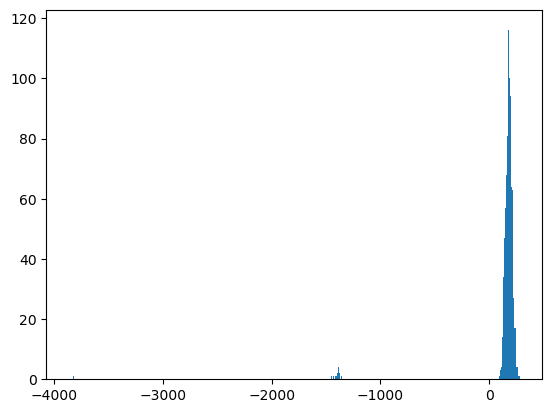

In [93]:
plt.hist(train_evaluation['Predictions'], bins = 1000)

In [94]:
X_dummies['linear_preds'] = train_preds.flatten()
X_dummies[X_dummies['linear_preds'] < 0]

,Year,Home_Total_Game_Score_avg2,Home_For_Goals_avg2,Home_For_Behinds_avg2,Home_For_Scores_avg2,Home_For_Total_Score_avg2,Home_Against_Goals_avg2,Home_Against_Behinds_avg2,Home_Against_Scores_avg2,Home_Against_Total_Score_avg2,Home_Total_Game_Score_avg10,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Scores_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Behinds_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Goals_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_For_Total_Score_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10,Venue_Adelaide Oval,Venue_Bellerive Oval,Venue_Carrara,Venue_Cazalys Stadium,Venue_Docklands,Venue_Eureka Stadium,Venue_Football Park,Venue_Gabba,Venue_Kardinia Park,Venue_M.C.G.,Venue_Manuka Oval,Venue_Marrara Oval,Venue_Perth Stadium,Venue_S.C.G.,Venue_Subiaco,Venue_Sydney Showground,Venue_Traeger Park,Venue_Wellington,Venue_York Park,Venue_character(0),Home_Team_Adelaide,Home_Team_Brisbane Lions,Home_Team_Carlton,Home_Team_Collingwood,Home_Team_Essendon,Home_Team_Fremantle,Home_Team_Geelong,Home_Team_Gold Coast,Home_Team_Greater Western Sydney,Home_Team_Hawthorn,Home_Team_Melbourne,Home_Team_North Melbourne,Home_Team_Port Adelaide,Home_Team_Richmond,Home_Team_St Kilda,Home_Team_Sydney,Home_Team_West Coast,Home_Team_Western Bulldogs,Away_Team_Adelaide,Away_Team_Brisbane Lions,Away_Team_Carlton,Away_Team_Collingwood,Away_Team_Essendon,Away_Team_Fremantle,Away_Team_Geelong,Away_Team_Gold Coast,Away_Team_Greater Western Sydney,Away_Team_Hawthorn,Away_Team_Melbourne,Away_Team_North Melbourne,Away_Team_Port Adelaide,Away_Team_Richmond,Away_Team_St Kilda,Away_Team_Sydney,Away_Team_West Coast,Away_Team_Western Bulldogs,linear_preds
2159,2017,168.5,9.0,14.0,23.0,68.0,15.0,10.5,25.5,100.5,176.1,11.8,13.8,25.6,84.6,13.4,11.1,24.5,91.5,172.0,14.0,13.0,27.0,97.0,10.5,12.0,22.5,75.0,168.5,12.9,11.8,24.7,89.2,11.3,11.5,22.8,79.3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3809.708008
2186,2018,192.0,11.0,6.0,17.0,72.0,18.5,9.0,27.5,120.0,165.1,12.8,8.1,20.9,84.9,12.0,11.6,23.6,83.6,169.0,11.5,8.0,19.5,77.0,14.0,8.0,22.0,92.0,170.0,15.1,10.3,25.4,100.9,9.9,9.7,19.6,69.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1380.619141
2191,2018,183.0,12.5,8.0,20.5,83.0,15.0,10.0,25.0,100.0,172.8,10.1,9.6,19.7,70.2,15.4,10.2,25.6,102.6,191.0,14.0,10.5,24.5,94.5,14.0,12.5,26.5,96.5,190.4,13.7,13.1,26.8,95.3,14.1,10.5,24.6,95.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1373.987671
2197,2018,166.0,12.5,9.5,22.0,84.5,11.0,15.5,26.5,81.5,163.1,9.7,7.9,17.6,66.1,13.8,14.2,28.0,97.0,180.0,14.5,14.0,28.5,101.0,12.0,7.0,19.0,79.0,172.4,10.1,10.6,20.7,71.2,15.2,10.0,25.2,101.2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1348.060425
2203,2018,183.0,16.0,12.0,28.0,108.0,10.0,15.0,25.0,75.0,172.1,13.6,9.0,22.6,90.6,12.2,11.7,23.9,84.9,205.0,14.5,11.5,26.0,98.5,15.5,13.5,29.0,106.5,168.5,11.7,11.9,23.6,82.1,12.5,11.4,23.9,86.4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1353.877441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [95]:
test_preds = linear_model.predict(X_test_dummies)
test_evaluation = pd.DataFrame({
    'Predictions':test_preds.flatten(),
    'Actuals':y_test
})
test_evaluation['abs_difference'] = abs(test_evaluation['Predictions'] - test_evaluation['Actuals'])
test_evaluation.describe()

15/15 [==============================] - 0s 458us/step


,Predictions,Actuals,abs_difference
count,476.000000,476.000000,476.000000
mean,-185.345352,179.327731,379.089308
std,1051.814941,32.937736,1041.888597
min,-3887.579346,85.000000,0.002411
25%,141.649555,157.750000,9.211441
50%,171.200310,180.000000,18.117447
75%,197.683651,201.250000,37.523766
max,268.655121,284.000000,4044.579346


(array([  4.,  17.,   9.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  11.,  14.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,  63., 174., 143.,
         29.]),
 array([-3887.579, -3846.017, -3804.455, -3762.892, -3721.33 , -3679.768,
        -3638.205, -3596.643, -3555.081, -3513.518, -3471.956, -3430.394,
        -3388.831, -3347.269, -3305.707, -3264.144, -3222.582, -3181.02 ,
        -3139.457, -3097.895, -3056.333, -3014.77 , -2973.208, -2931.646,
        -2890.083, -28

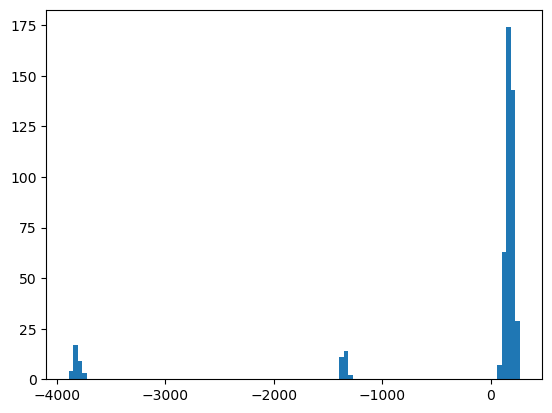

In [96]:
plt.hist(test_evaluation['Predictions'], bins = 100)

In [97]:
X_test_dummies['linear_preds'] = test_preds.flatten()

In [98]:
X_test_dummies[X_test_dummies['linear_preds'] < 0]

,Year,Home_Total_Game_Score_avg2,Home_For_Goals_avg2,Home_For_Behinds_avg2,Home_For_Scores_avg2,Home_For_Total_Score_avg2,Home_Against_Goals_avg2,Home_Against_Behinds_avg2,Home_Against_Scores_avg2,Home_Against_Total_Score_avg2,Home_Total_Game_Score_avg10,Home_For_Goals_avg10,Home_For_Behinds_avg10,Home_For_Scores_avg10,Home_For_Total_Score_avg10,Home_Against_Goals_avg10,Home_Against_Behinds_avg10,Home_Against_Scores_avg10,Home_Against_Total_Score_avg10,Away_Total_Game_Score_avg2,Away_For_Goals_avg2,Away_For_Behinds_avg2,Away_For_Scores_avg2,Away_For_Total_Score_avg2,Away_Against_Goals_avg2,Away_Against_Behinds_avg2,Away_Against_Scores_avg2,Away_Against_Total_Score_avg2,Away_Total_Game_Score_avg10,Away_For_Goals_avg10,Away_For_Behinds_avg10,Away_For_Scores_avg10,Away_For_Total_Score_avg10,Away_Against_Goals_avg10,Away_Against_Behinds_avg10,Away_Against_Scores_avg10,Away_Against_Total_Score_avg10,Venue_Adelaide Oval,Venue_Bellerive Oval,Venue_Carrara,Venue_Cazalys Stadium,Venue_Docklands,Venue_Football Park,Venue_Gabba,Venue_Kardinia Park,Venue_M.C.G.,Venue_Manuka Oval,Venue_Marrara Oval,Venue_Perth Stadium,Venue_S.C.G.,Venue_Subiaco,Venue_Sydney Showground,Venue_Wellington,Venue_York Park,Venue_character(0),Home_Team_Adelaide,Home_Team_Brisbane Lions,Home_Team_Carlton,Home_Team_Collingwood,Home_Team_Essendon,Home_Team_Fremantle,Home_Team_Geelong,Home_Team_Gold Coast,Home_Team_Greater Western Sydney,Home_Team_Hawthorn,Home_Team_Melbourne,Home_Team_North Melbourne,Home_Team_Port Adelaide,Home_Team_Richmond,Home_Team_St Kilda,Home_Team_Sydney,Home_Team_West Coast,Home_Team_Western Bulldogs,Away_Team_Adelaide,Away_Team_Brisbane Lions,Away_Team_Carlton,Away_Team_Collingwood,Away_Team_Essendon,Away_Team_Fremantle,Away_Team_Geelong,Away_Team_Gold Coast,Away_Team_Greater Western Sydney,Away_Team_Hawthorn,Away_Team_Melbourne,Away_Team_North Melbourne,Away_Team_Port Adelaide,Away_Team_Richmond,Away_Team_St Kilda,Away_Team_Sydney,Away_Team_West Coast,Away_Team_Western Bulldogs,Venue_Eureka Stadium,Venue_Traeger Park,linear_preds
37,2007,144.5,13.0,12.0,25.0,90.0,7.5,9.5,17.0,54.5,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,153.0,3.0,3.5,6.5,21.5,7.0,6.0,13.0,48.0,173.8038,12.486932,11.141717,23.628649,86.063309,12.410072,11.107177,23.51725,85.567612,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-3848.328369
104,2007,151.0,12.5,13.0,25.5,88.0,9.0,9.0,18.0,63.0,156.0000,11.900000,11.900000,23.800000,83.300000,10.000000,12.700000,22.70000,72.700000,157.5,9.5,6.0,15.5,63.0,13.5,13.5,27.0,94.5,178.5000,14.100000,11.000000,25.100000,95.600000,11.900000,11.500000,23.40000,82.900000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-3837.836914
109,2007,153.0,10.5,16.0,26.5,79.0,11.0,8.0,19.0,74.0,163.2000,12.500000,10.600000,23.100000,85.600000,11.200000,10.400000,21.60000,77.600000,209.5,18.0,9.0,27.0,117.0,12.0,20.5,32.5,92.5,190.2000,13.900000,13.100000,27.000000,96.500000,13.200000,14.500000,27.70000,93.700000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1330.898071
133,2007,246.0,24.5,12.0,36.5,159.0,13.0,9.0,22.0,87.0,219.9000,16.100000,12.000000,28.100000,108.600000,13.900000,10.300000,24.20000,93.700000,212.5,10.0,8.0,18.0,68.0,22.0,12.5,34.5,144.5,199.5000,12.600000,10.500000,23.100000,86.100000,16.300000,15.600000,31.90000,113.400000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-3731.650146
134,2007,211.0,18.0,11.0,29.0,119.0,13.0,14.0,27.0,92.0,177.3000,14.400000,11.700000,26.100000,98.100000,11.400000,10.800000,22.20000,79.200000,232.5,12.5,11.0,23.5,86.0,22.5,11.5,34.0,146.5,200.5000,13.100000,11.400000,24.500000,90.000000,16.000000,14.500000,30.50000,110.500000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [100]:
X_test_dummies[X_test_dummies['Venue_Subiaco'] == 1]['linear_preds'].describe()

count     49.000000
mean     161.316452
std       34.173187
min       86.137062
25%      137.180542
50%      166.380814
75%      186.437744
max      215.002411
Name: linear_preds, dtype: float64

In [101]:
X_test_dummies[X_test_dummies['linear_preds'] < 0]['Venue_Subiaco'].value_counts()

0    60
Name: Venue_Subiaco, dtype: int64

In [102]:
X_dummies['Venue_Subiaco'].value_counts()

0    1705
1     204
Name: Venue_Subiaco, dtype: int64

In [103]:
training_data[training_data['Venue'] == 'Subiaco']['Total_Game_Score']

3       226
14      162
18      171
31      139
47      139
       ... 
2131    158
2136    157
2149    183
2154    206
2168    171
Name: Total_Game_Score, Length: 204, dtype: int64

Regression with Deep Neural Network (DNN)

In [104]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Single Variable Input

In [105]:
dnn_avg2_model = build_and_compile_model(total_game_score_avg2_normalizer)

In [106]:
dnn_avg2_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 64)                128       
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [107]:
%%time
history = dnn_avg2_model.fit(
    X_dummies['Home_Total_Game_Score_avg2'],
    y,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
48/48 [==============================] - 0s 2ms/step - loss: 182.5018 - val_loss: 170.6726
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 178.7511 - val_loss: 164.2335
Epoch 3/100
48/48 [==============================] - 0s 939us/step - loss: 165.8604 - val_loss: 145.1074
Epoch 4/100
48/48 [==============================] - 0s 864us/step - loss: 133.6906 - val_loss: 102.3422
Epoch 5/100
48/48 [==============================] - 0s 941us/step - loss: 76.1495 - val_loss: 44.4927
Epoch 6/100
48/48 [==============================] - 0s 858us/step - loss: 33.4060 - val_loss: 24.8197
Epoch 7/100
48/48 [==============================] - 0s 885us/step - loss: 24.5198 - val_loss: 21.7882
Epoch 8/100
48/48 [==============================] - 0s 860us/step - loss: 21.2944 - val_loss: 19.6649
Epoch 9/100
48/48 [==============================] - 0s 855us/step - loss: 19.4661 - val_loss: 18.7516
Epoch 10/100
48/48 [==============================] - 0s 867us/step -

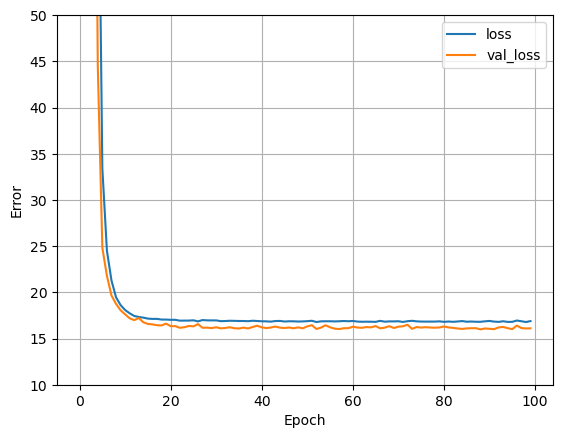

In [108]:
plot_loss(history)

In [109]:
x_axis = tf.linspace(0.0, 300, 301)
y_axis = dnn_avg2_model.predict(x_axis)

10/10 [==============================] - 0s 546us/step


In [110]:
x_axis, y_axis

(<tf.Tensor: shape=(301,), dtype=float32, numpy=
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 1

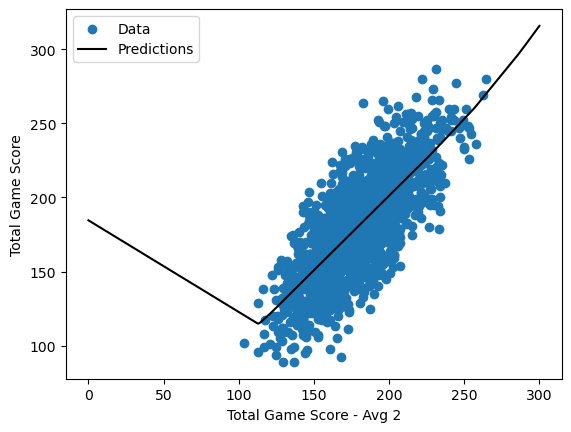

In [111]:
plot_total_game_score_avg2(x_axis, y_axis)

In [112]:
X_dummies['Home_Total_Game_Score_avg2'].describe()

count    1909.000000
mean      180.355869
std        24.427917
min       103.500000
25%       164.000000
50%       180.000000
75%       196.000000
max       264.500000
Name: Home_Total_Game_Score_avg2, dtype: float64

In [113]:
test_results['dnn_avg2_model'] = dnn_avg2_model.evaluate(
    X_test_dummies['Home_Total_Game_Score_avg2'], y_test,
    verbose=0)

DNN using multiple inputs

In [122]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 93)               187       
 ion)                                                            
                                                                 
 dense_17 (Dense)            (None, 64)                6016      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,428
Trainable params: 10,241
Non-trainable params: 187
_________________________________________________________________


In [123]:
X_dummies.shape

(1909, 93)

In [124]:
%%time
history = dnn_model.fit(
    X_dummies,
    y,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.82 s, sys: 1.23 s, total: 7.04 s
Wall time: 4.4 s


In [125]:
history

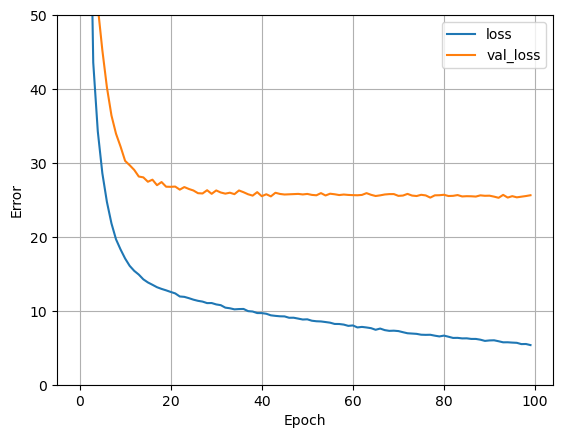

In [126]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,50])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  
plot_loss(history)

In [127]:
dnn_model.predict(X_dummies).mean(), y.mean()

60/60 [==============================] - 0s 409us/step


(178.77069, 180.90256678889472)

In [128]:
abs(np.array(dnn_model.predict(X_dummies)) - np.array(y))

60/60 [==============================] - 0s 523us/step


array([[  5.234,  52.234,  12.766, ...,  18.766,   2.234,  20.766],
       [ 23.887,  70.887,   5.887, ...,   0.113,  20.887,   2.113],
       [  9.48 ,  56.48 ,   8.52 , ...,  14.52 ,   6.48 ,  16.52 ],
       ...,
       [ 36.67 ,  83.67 ,  18.67 , ...,  12.67 ,  33.67 ,  10.67 ],
       [165.106, 212.106, 147.106, ..., 141.106, 162.106, 139.106],
       [ 31.488,  78.488,  13.488, ...,   7.488,  28.488,   5.488]])

60/60 [==============================] - 0s 389us/step


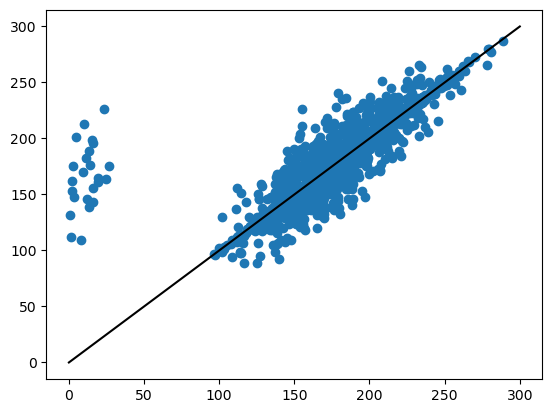

In [129]:
plt.scatter(dnn_model.predict(X_dummies), y)
x_axis = tf.linspace(0, 300, 301)
plt.plot(x_axis, x_axis, color = "black")

In [130]:
dnn_preds = pd.Series(dnn_model.predict(X_dummies).flatten())
dnn_preds.mean(), y.mean(), dnn_preds.median(), y.median()

60/60 [==============================] - 0s 414us/step


(178.77069, 180.90256678889472, 179.3875274658203, 181.0)

15/15 [==============================] - 0s 469us/step


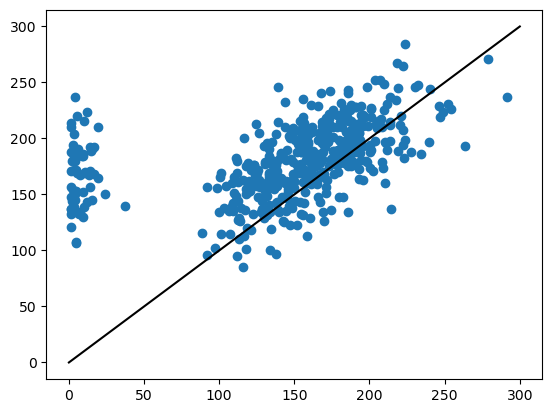

In [131]:
plt.scatter(dnn_model.predict(X_test_dummies), y_test)
x_axis = tf.linspace(0, 300, 301)
plt.plot(x_axis, x_axis, color = "black")

In [132]:
dnn_test_preds = pd.Series(dnn_model.predict(X_test_dummies).flatten())
dnn_test_preds.mean(), y_test.mean(), dnn_test_preds.median(), y_test.median()

15/15 [==============================] - 0s 499us/step


(143.40182, 179.32773109243698, 154.66738891601562, 180.0)

In [133]:
test_results['dnn_model'] = dnn_model.evaluate(
    X_test_dummies, y_test, verbose=0)

In [134]:
test_results

{'total_game_score_avg2_model': 16.580551147460938,
 'linear_model': 379.08929443359375,
 'dnn_avg2_model': 16.5842342376709,
 'dnn_model': 43.85287094116211}

Evaluate Model

In [135]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
total_game_score_avg2_model,16.580551
linear_model,379.089294
dnn_avg2_model,16.584234
dnn_model,43.852871


15/15 [==============================] - 0s 492us/step


[]

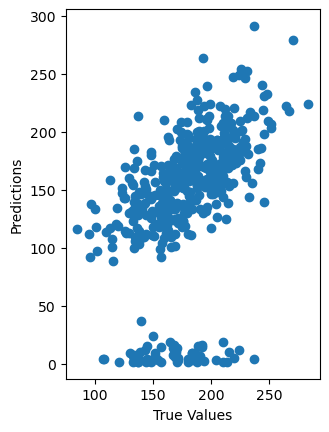

In [136]:
test_predictions = dnn_model.predict(X_test_dummies).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot()

Text(0, 0.5, 'Count')

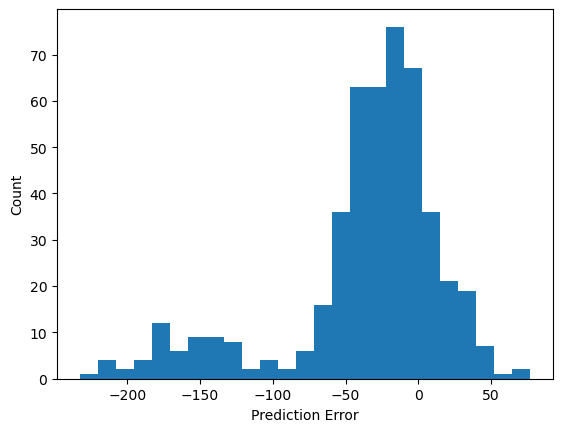

In [137]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')

In [138]:
def MAE(data, model, actuals):

    preds = model.predict(data).flatten()
    absolute_error = abs(preds - actuals)
    mae = np.mean(absolute_error)

    return mae

In [139]:
def RMSE(data, model, actuals):

    preds = model.predict(data).flatten()
    squared_error = (preds - actuals)**2
    mean_squared_error = np.mean(squared_error)
    rmse = (mean_squared_error)**0.5

    return rmse

In [140]:
def get_error_metrics(data, model, actuals):

    mae = MAE(data, model, actuals)
    rmse = RMSE(data, model, actuals)

    print("MAE: {}".format(mae))
    print("RMSE: {}".format(rmse))

    return mae, rmse

In [141]:
get_error_metrics(X_dummies, dnn_model, y)

60/60 [==============================] - 0s 380us/step
MAE: 9.181549243898276
RMSE: 21.462702413967413


(9.181549243898276, 21.462702413967413)

In [142]:
get_error_metrics(X_test_dummies, dnn_model, y_test)

15/15 [==============================] - 0s 464us/step
MAE: 43.852872698246934
RMSE: 65.48038616826744


(43.852872698246934, 65.48038616826744)

Save model predictions

In [147]:
data_features = data[list(X)]
data_dummies = pd.get_dummies(data_features)
data_dummies = data_dummies[list(X_dummies)]
data_response = data[response]

data['dnn_preds'] = dnn_model.predict(data_dummies)

94/94 [==============================] - 0s 379us/step


In [148]:
data['dnn_preds'].mean(), data[response].mean()

(172.26842, 176.74883566200933)

In [149]:
data['std_dev'] = np.std(y)

In [150]:
data[['Match_ID', 'Date', 'Total_Game_Score', 'dnn_preds', 'std_dev']].head()

,Match_ID,Date,Total_Game_Score,dnn_preds,std_dev
0,200701_Adelaide_Essendon,2007-04-01 13:10:00,179,173.765839,32.125702
1,200701_BrisbaneLions_Hawthorn,2007-03-31 19:15:00,113,176.556244,32.125702
2,200701_Carlton_Richmond,2007-04-01 17:10:00,213,156.573639,32.125702
3,200701_Fremantle_PortAdelaide,2007-03-31 16:10:00,226,155.112930,32.125702
4,200701_Melbourne_StKilda,2007-03-30 19:40:00,155,160.030518,32.125702


In [152]:
data[['Match_ID', 'Date', 'Total_Game_Score', 'dnn_preds', 'std_dev']].to_csv("/total-points-score-model/data/model-predictions/dnn_model_preds.csv")